# Implementação em Python de codificações digitais

**Sumário:**

  - Unipolar 
    - RZ
    - NRZ
  - Bipolar 
    - RZ
    - NRZ
  - Polar Quaternário NRZ
  - NRZI
      - NRZM
      - NRZS
  - Manchester
  
---

## Informação não codificada
Abaixo é instanciado uma informação não codificada `uncoded_data`, para ser utilizado como teste para todas as codificações a serem implementadas.
Também é definida o período de bit `bit_period` e de amostragem `sampling_period`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    uncoded_data = np.array([0b10110010], dtype=np.uint8)
    bit_period = 1  # 100e-6
    sampling_period = 0.1  # 100e-9

    print(f'uncoded data: {uncoded_data}')
    print(f'bit period: {bit_period} s')
    print(f'sampling period: {sampling_period} s')

uncoded data: [178]
bit period: 1 s
sampling period: 0.1 s


## Unipolar RZ (Return-to-Zero)

Encoding: Unipolar RZ
encoded data: [1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


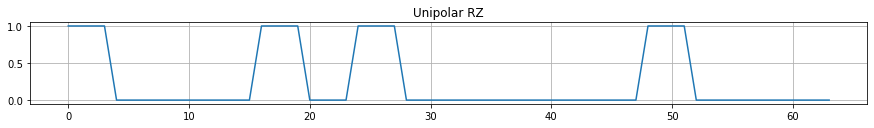

In [2]:
def encode_unipolar_rz(data: np.array,
                       bit_period: float = 1,
                       sampling_period: float = 0.1,
                       high_level: float = 1
                       ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period // sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bit in bitarray:
        if bit == 1:
            symbol = [high_level] * (length // 2)
        else:
            symbol = [0] * (length // 2)
        symbol += [0] * (length // 2)
        symbols += symbol

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Unipolar RZ')
    encoded_data = encode_unipolar_rz(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Unipolar RZ')
    plt.plot(encoded_data)
    plt.grid()

## Unipolar NRZ (Non-Return-to-Zero)

Encoding: Unipolar NRZ
encoded data: [1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]


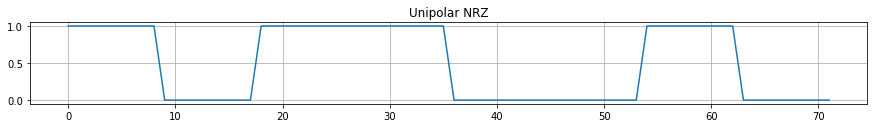

In [3]:
def encode_unipolar_nrz(data: np.array,
                        bit_period: float = 1,
                        sampling_period: float = 0.1,
                        high_level: float = 1
                        ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period // sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bit in bitarray:
        if bit == 1:
            symbol = [high_level] * length
        else:
            symbol = [0] * length
        symbols += symbol

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Unipolar NRZ')
    encoded_data = encode_unipolar_nrz(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Unipolar NRZ')
    plt.plot(encoded_data)
    plt.grid()

##  Bipolar RZ (Return-to-Zero)

Encoding: Bipolar RZ
encoded data: [ 1  1  1  1  0  0  0  0 -1 -1 -1 -1  0  0  0  0  1  1  1  1  0  0  0  0
  1  1  1  1  0  0  0  0 -1 -1 -1 -1  0  0  0  0 -1 -1 -1 -1  0  0  0  0
  1  1  1  1  0  0  0  0 -1 -1 -1 -1  0  0  0  0]


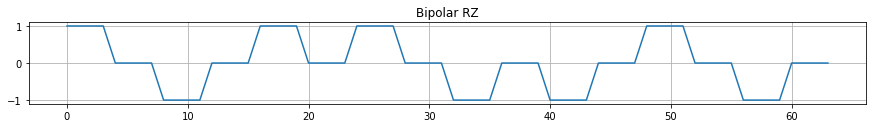

In [4]:
def encode_bipolar_rz(data: np.array,
                      bit_period: float = 1,
                      sampling_period: float = 0.1,
                      high_level: float = 1
                      ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period // sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bit in bitarray:
        if bit == 1:
            symbol = [high_level] * (length // 2)
        else:
            symbol = [-high_level] * (length // 2)
        symbol += [0] * (length // 2)
        symbols += symbol

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Bipolar RZ')
    encoded_data = encode_bipolar_rz(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Bipolar RZ')
    plt.plot(encoded_data)
    plt.grid()

## Polar Quaternário NRZ (Non-Return-to-Zero)

Encoding: Polar Quaternary NRZ
encoded data: [0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333]


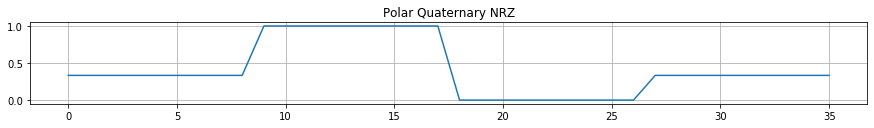

In [5]:
def encode_polar4_nrz(data: np.array,
                      bit_period: float = 1,
                      sampling_period: float = 0.1,
                      high_level: float = 1
                      ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period // sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bits in bitarray.reshape(len(bitarray) // 2, 2):
        num = int(str(bits[1]) + str(bits[0]), 2)
        symbol = [high_level * num / 3.] * length

        symbols += symbol

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Polar Quaternary NRZ')
    encoded_data = encode_polar4_nrz(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Polar Quaternary NRZ')
    plt.plot(encoded_data)
    plt.grid()

##  Bipolar NRZ (Non-Return-to-Zero)

Encoding: Bipolar NRZ
encoded data: [ 1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


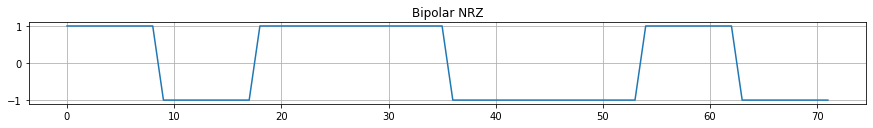

In [6]:
def encode_bipolar_nrz(data: np.array,
                       bit_period: float = 1,
                       sampling_period: float = 0.1,
                       high_level: float = 1
                       ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period // sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bit in bitarray:
        if int(bit) == 1:
            symbol = [high_level] * length
        else:
            symbol = [-high_level] * length
        symbols += symbol

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Bipolar NRZ')
    encoded_data = encode_bipolar_nrz(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Bipolar NRZ')
    plt.plot(encoded_data)
    plt.grid()

## NRZM (Non-Return-to-Zero Mark)

Encoding: NRZM
encoded data: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


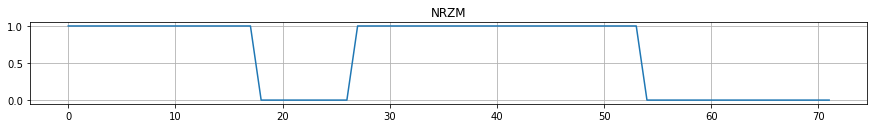

In [7]:
def encode_nrzm(data: np.array,
                bit_period: float = 1,
                sampling_period: float = 0.1,
                high_level: float = 1
                ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period // sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    def _encode_nrzm_(bit):
        if not hasattr(_encode_nrzm_, "level"):
            _encode_nrzm_.level = 0

        if bit == 1:
            _encode_nrzm_.level ^= 1

        symbol = [_encode_nrzm_.level * high_level] * length
        return symbol

    for bit in bitarray:
        symbols += _encode_nrzm_(bit)

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: NRZM')
    encoded_data = encode_nrzm(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('NRZM')
    plt.plot(encoded_data)
    plt.grid()

## NRZS (Non-Return-to-Zero Space)

Encoding: NRZS
encoded data: [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]


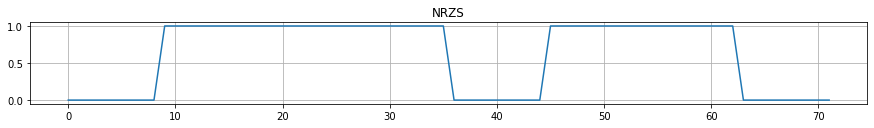

In [8]:
def encode_nrzs(data: np.array,
                bit_period: float = 1,
                sampling_period: float = 0.1,
                high_level: float = 1
                ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period // sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    def _encode_nrzs_(bit):
        if not hasattr(encode_nrzs, "level"):
            encode_nrzs.level = 0

        if bit == 0:
            encode_nrzs.level ^= 1

        symbol = [encode_nrzs.level * high_level] * length
        return symbol

    for bit in bitarray:
        symbols += _encode_nrzs_(bit)

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: NRZS')
    encoded_data = encode_nrzs(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('NRZS')
    plt.plot(encoded_data)
    plt.grid()

##  Manchester

Encoding: Manchester
encoded data: [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]


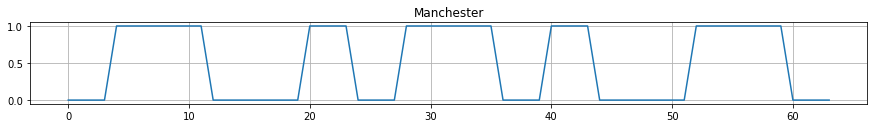

In [9]:
def encode_manchester(data: np.array,
                       bit_period: float = 1,
                       sampling_period: float = 0.1,
                       high_level: float = 1
                       ) -> np.array:

    if type(data) != type(np.array([], dtype=np.uint8)):
        raise SystemExit('Error: Expecting dtype=np.array for parameter data.')

    length = int(bit_period // sampling_period)
    bitarray = np.unpackbits(data)
    symbols = []

    for bit in bitarray:
        clock = [1] * (length//2) + [0] * (length//2)
        symbol = list((np.array(clock) ^ bit) * high_level)
        symbols += symbol

    return np.array(symbols)


if __name__ == '__main__' and callable(globals().get("get_ipython", None)):
    print('Encoding: Manchester')
    encoded_data = encode_manchester(
        uncoded_data, bit_period, sampling_period)
    print(f'encoded data: {encoded_data}')

    plt.figure(figsize=(15, 1.5))
    plt.title('Manchester')
    plt.plot(encoded_data)
    plt.grid()